In [159]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

# Задание 2
<br> Считать в pandas.DataFrame любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [109]:
df = pd.concat(pd.read_csv(f'../lab2/20250{i}/players.csv') for i in range(1,5))
df

C:\Users\Roma\AppData\Local\Temp\ipykernel_16664\3887877372.py:1: DtypeWarning: Columns (148) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(pd.read_csv(f'../lab2/20250{i}/players.csv') for i in range(1,5))
C:\Users\Roma\AppData\Local\Temp\ipykernel_16664\3887877372.py:1: DtypeWarning: Columns (51,52,128,150) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(pd.read_csv(f'../lab2/20250{i}/players.csv') for i in range(1,5))


,player_slot,obs_placed,sen_placed,creeps_stacked,camps_stacked,rune_pickups,firstblood_claimed,teamfight_participation,towers_killed,roshans_killed,...,purchase_rapier,match_id,leagueid,performance_others,additional_units,repicked,hero_variant,neutral_tokens_log,neutral_item_history,item_neutral2
0,0,0.0,0.0,4.0,2.0,1.0,0.0,0.863636,0.0,0.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,"[{'time': 433, 'key': 'Tier1Token'}, {'time': ...",NaN,NaN
1,1,2.0,0.0,3.0,1.0,5.0,0.0,0.636364,3.0,0.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,"[{'time': 1918, 'key': 'Tier3Token'}]",NaN,NaN
2,2,0.0,0.0,6.0,2.0,7.0,0.0,0.227273,2.0,1.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,"[{'time': 473, 'key': 'Tier1Token'}, {'time': ...",NaN,NaN
3,3,9.0,12.0,66.0,12.0,1.0,0.0,0.227273,0.0,0.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,[],NaN,NaN
4,4,4.0,5.0,43.0,7.0,3.0,0.0,0.818182,1.0,0.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,128,3.0,2.0,8.0,3.0,0.0,0.0,0.400000,0.0,0.0,...,NaN,8245079060,17211,NaN,NaN,NaN,3.0,[],"[{'time': 488, 'item_neutral': 'mana_draught',...",1586.0
6416,129,0.0,0.0,0.0,0.0,3.0,0.0,0.266667,0.0,0.0,...,NaN,8245079060,17211,NaN,NaN,NaN,1.0,[],"[{'time': 450, 'item_neutral': 'polliwog_charm...",1577.0
6417,130,1.0,1.0,3.0,1.0,2.0,0.0,0.333333,1.0,0.0,...,NaN,8245079060,17211,NaN,NaN,NaN,2.0,[],"[{'time': 458, 'item_neutral': 'spark_of_coura...",1594.0
6418,131,2.0,0.0,0.0,0.0,11.0,0.0,0.866667,2.0,0.0,...,NaN,8245079060,17211,NaN,NaN,NaN,1.0,[],"[{'time': 461, 'item_neutral': 'trusty_shovel'...",1583.0


## Прошу прочитать

В ходе выполнения задания, натолкнулся на проблему в выборе данных (столбцов) из-за которых пункт с отфильтрованными данными пришлось пропустить.

Как проходило исследование в лабораторной работе

1. Я отобрал признаки такие как золото в минуту, убиства и т.д. (только численные признаки)
    - получилось что классификатор выдает 50% f1-мера
    - не важно нормализовал ли я данные или нет
    - пришел к выводу, что видимо отобранные признаки не подходят
2. Путем логических умозаключений пришел к идее удалить данные за сторону тьмы
    - то есть мы удаляем все данные за игроков силы тьмы и оставляем только за свет
    - тут получилось, что не нормализовывая выдает f1-меру на уровне ~75%
    - если нормализовать, то f1-мера на уровне 90%
    - в целом точность увеличилась и все счастливы
3. Все счастливы кроме меня, у меня возник вопрос (сомнение?), как будто если бы я теряю половину данных, это не круто
    - чтобы исправить это вернул все данные и добавил категориальные значения
    - не нормализованные данные показали результат 50%
    - нормализованные данные показали 90% точность
    - но матрица корреляции показывала 0 (или минусовую) кореляцию между признаками и победой сил света
    - тут возник вопрос (ну не может же быть, что нет кореляции, вернулся к пункту 2 посмотрел, кореляция присутсвует)
    - значит проблема в том, что данные и с одной стороны и с другой стороны
    - решение проблемы не придумалось (появилась идея добавить матч id чтобы )
4. С id матча повысилась точность на не нормализованных данных
    - 88% на не нормализованных данных
    - но если нормализовать, то точность только немного выросла до 89%
    - но корреляционная матрица, снова выдает ~0 значения, следовательно нет линейной зависимости
    - поэтому пункт с отфильтрованными признаками был не выполнен (он работает только в случае, когда удаляем все данные сил тьмы - там появляются линейные зависимости между данными)

In [ ]:
# Выбор признаков и целевой переменной
#Осуществить предобработку данных (избавиться от null, убрать некоторые признаки и т.п.) - "подчистить данные".
features = [
    'gold_per_min', 
    'xp_per_min', 
    'kills', 
    'deaths', 
    'assists',
    'hero_damage', 
    'tower_damage', 
    'last_hits', 
    'denies',
    'duration',
    'match_id', #категориальные данные
    'lane_role', #категориальные данные
    'isRadiant', #категориальные данные
]

target = 'radiant_win'
#data = df[df['isRadiant']].copy()
data = df[features + [target]]
data['radiant_win'] = data['radiant_win'].apply(lambda x : 1 if x else 0)
#data['isRadiant'] = data['isRadiant'].astype(int)
data.dropna()
#data = pd.get_dummies(data, columns=['lane_role'], prefix='lane_role')
#data[['lane_role_1.0','lane_role_2.0','lane_role_3.0','lane_role_4.0']] = data[['lane_role_1.0','lane_role_2.0','lane_role_3.0','lane_role_4.0']].astype(int)
data

C:\Users\Roma\AppData\Local\Temp\ipykernel_16664\3026654323.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['radiant_win'] = data['radiant_win'].apply(lambda x : 1 if x else 0)


,gold_per_min,xp_per_min,kills,deaths,assists,hero_damage,tower_damage,last_hits,denies,duration,match_id,lane_role,isRadiant,radiant_win
0,595,793,8,8,11,23790,1082,228,0,2059,8107483721,3.0,True,0
1,616,748,6,4,8,19636,4663,286,1,2059,8107483721,2.0,True,0
2,764,1061,3,3,2,11558,4904,494,1,2059,8107483721,1.0,True,0
3,255,456,1,6,5,8902,0,62,1,2059,8107483721,1.0,True,0
4,325,540,4,10,14,16204,373,23,0,2059,8107483721,3.0,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,228,337,2,6,4,10346,538,29,0,1723,8245079060,3.0,False,1
6416,442,449,0,4,4,10149,612,221,1,1723,8245079060,3.0,False,1
6417,484,526,1,5,4,6320,865,255,0,1723,8245079060,1.0,False,1
6418,526,591,11,5,2,28362,933,180,5,1723,8245079060,2.0,False,1


In [128]:
# Разделение на признаки и целевую переменную
data = data.dropna()
X = data.drop('radiant_win', axis=1)
y = data[target].astype(int)
X,y

(      gold_per_min  xp_per_min  kills  deaths  assists  hero_damage  \
 0              595         793      8       8       11        23790   
 1              616         748      6       4        8        19636   
 2              764        1061      3       3        2        11558   
 3              255         456      1       6        5         8902   
 4              325         540      4      10       14        16204   
 ...            ...         ...    ...     ...      ...          ...   
 6415           228         337      2       6        4        10346   
 6416           442         449      0       4        4        10149   
 6417           484         526      1       5        4         6320   
 6418           526         591     11       5        2        28362   
 6419           238         342      1       8        9        13436   
 
       tower_damage  last_hits  denies  duration    match_id  lane_role  \
 0             1082        228       0      2059  810748372

In [ ]:
#Разбить выборку на обучающую и тестовую.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42
)

In [ ]:
#Выбрать какое-нибудь значение гиперпараметра k алгоритма kNN.
#Осуществить бинарную классификацию.
#Посчитать метрики: accuracy, precision, recall, f-measure, а также составить classification_report.
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Без нормализации:")
print(classification_report(y_test, y_pred))

Без нормализации:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12051
           1       0.88      0.89      0.89     12984

    accuracy                           0.88     25035
   macro avg       0.88      0.88      0.88     25035
weighted avg       0.88      0.88      0.88     25035



In [ ]:
#Закодировать категориальные признаки при необходимости.
#Сравнить метрики на данных без нормализации и с применением нормализации.
numeric_features = ['gold_per_min', 'xp_per_min', 'kills', 'deaths', 'assists', 
                    'hero_damage', 'tower_damage', 'last_hits', 'denies']
categorical_features = ['lane_role','isRadiant','match_id']
#categorical_features = ['lane_role']

# Определяем трансформер
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Масштабирование числовых признаков
        ('cat', OneHotEncoder(), categorical_features)  # Кодирование категориальных
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])



# Обучение
pipeline.fit(X_train, y_train)

# Предсказания
y_pred = pipeline.predict(X_test)

# Оценка
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12051
           1       0.89      0.89      0.89     12984

    accuracy                           0.89     25035
   macro avg       0.89      0.89      0.89     25035
weighted avg       0.89      0.89      0.89     25035



(пункты соотвествуют пунктам в "прошу прочитать")
1. Видим, что метрики не изменились (50% - случайность)
2. Видим, что метрики выросли на 15-16% (относительно не нормализованных данных)
3. Видим, что метрики выросли на 30-40% (относительно не нормализованных данных, теперь не случайность)
4. Видим, что метрики не изменились (на 1% выросли)

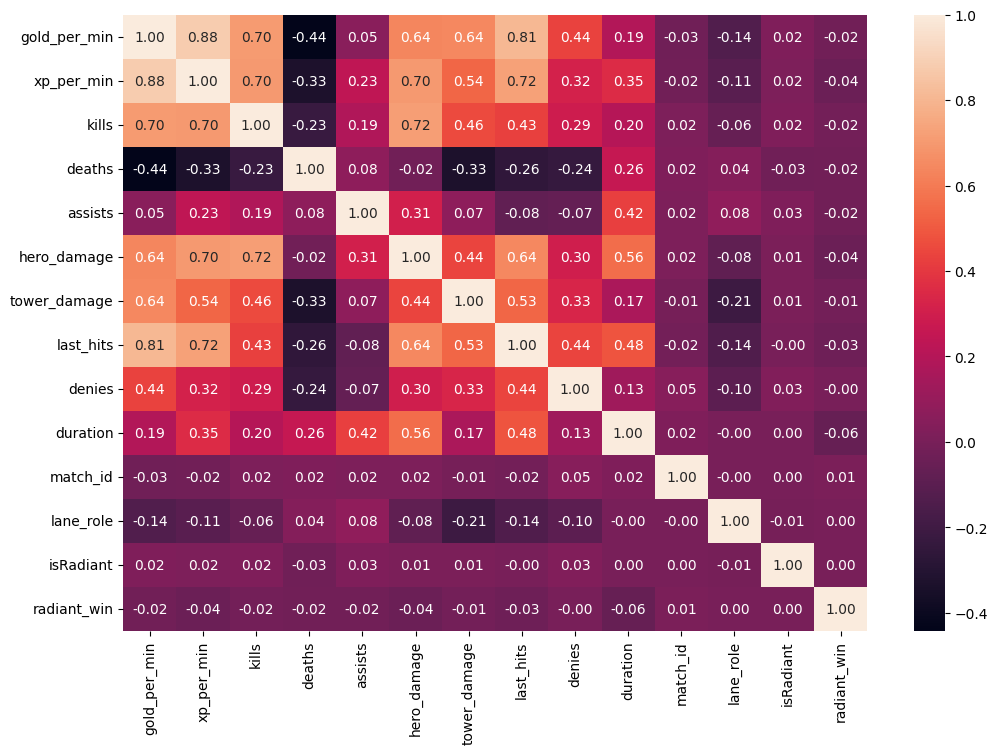

In [ ]:
#Построить сorrelation heatmap и/или воспользоваться методом corr(). Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений
# Построение heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

И тут видно проблему в том, что мы не видим корреляции между данными (линейной зависимости), хотя если рассуждать, не может не быть никакой зависимости в данных.

Из-за этого код ниже не работает (он запускается, но так как corr_with_target имеет 0 столбцов, все не работает)

In [146]:
#Работает, только в случае есть есть корреляция > 0.1
# Выбор признаков с корреляцией > 0.1
"""corr_with_target = data.corr()['radiant_win'].abs().sort_values(ascending=False)
selected_features = corr_with_target[corr_with_target > 0.1].index.tolist()
selected_features.remove('radiant_win')

# Фильтрация данных
X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]

# Нормализация отфильтрованных данных
scaler_filtered = StandardScaler()
X_train_fs = scaler_filtered.fit_transform(X_train_filtered)
X_test_fs = scaler_filtered.transform(X_test_filtered)

# Обучение на отфильтрованных данных
knn_filtered = KNeighborsClassifier(n_neighbors=5)
knn_filtered.fit(X_train_fs, y_train)
y_pred_fs = knn_filtered.predict(X_test_fs)

print("После отбора признаков:")
print(classification_report(y_test, y_pred_fs))"""

""

''

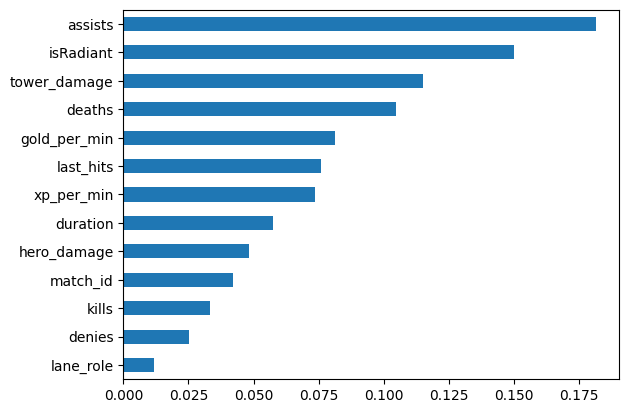

In [ ]:
#Осуществить бинарную классификацию с отфильтрованными признаками.
# для того, чтобы выполнить задание использовался случайный лес с оценков важности признаков
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Важность признаков
pd.Series(model.feature_importances_, index=X.columns).sort_values().plot.barh()
plt.show()

In [ ]:
# Важность признаков (в процентах)
feature_importances = model.feature_importances_ * 100

# Создание DataFrame с важностями
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Сортировка по убыванию важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)
selected_features = importance_df[importance_df['Importance'] > 7.5]['Feature'].tolist()

# Фильтрация данных
X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]

# Нормализация отфильтрованных данных
scaler_filtered = StandardScaler()
X_train_fs = scaler_filtered.fit_transform(X_train_filtered)
X_test_fs = scaler_filtered.transform(X_test_filtered)

# Обучение на отфильтрованных данных
knn_filtered = KNeighborsClassifier(n_neighbors=5)
knn_filtered.fit(X_train_fs, y_train)
y_pred_fs = knn_filtered.predict(X_test_fs)

#Посчитать метрики: accuracy , precision, recall, f-measure , а также составить classification_report.
print("После отбора признаков:")
print(classification_report(y_test, y_pred_fs))

После отбора признаков:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     12051
           1       0.89      0.89      0.89     12984

    accuracy                           0.89     25035
   macro avg       0.89      0.89      0.89     25035
weighted avg       0.89      0.89      0.89     25035



Сравнить результаты "до" и "после" фильтрации, сделать выводы.

Можно увидеть, что точность не выросла, но в этом случае работаем с меньшим количеством данных, и время работы должно уменьшиться

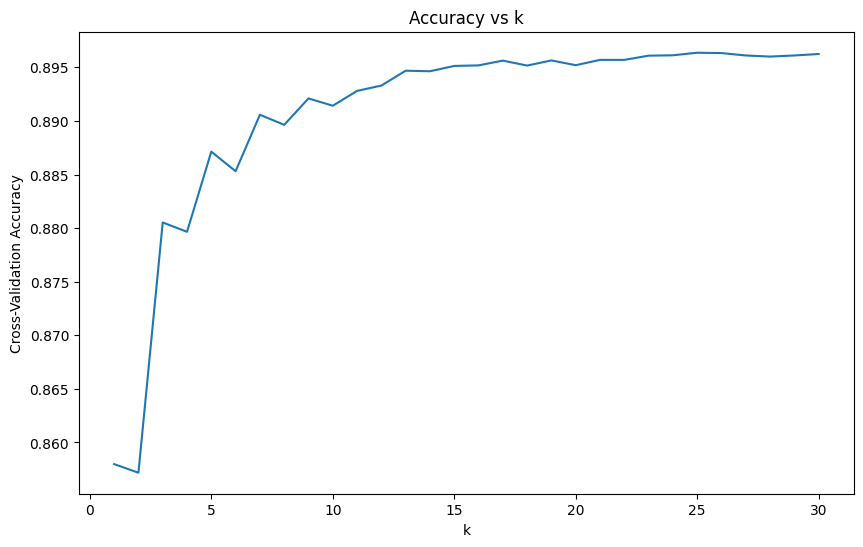

In [ ]:
#Перебрать значения гиперпараметра k в каком-нибудь диапазоне с использованием кросс-валидации на данных
#убраны "лишние" данные
# Диапазон значений k
k_values = list(range(1, 31))
cv_scores = []

# Кросс-валидация
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_fs, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# График точности
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores)
plt.xlabel('k')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Accuracy vs k')
plt.show()

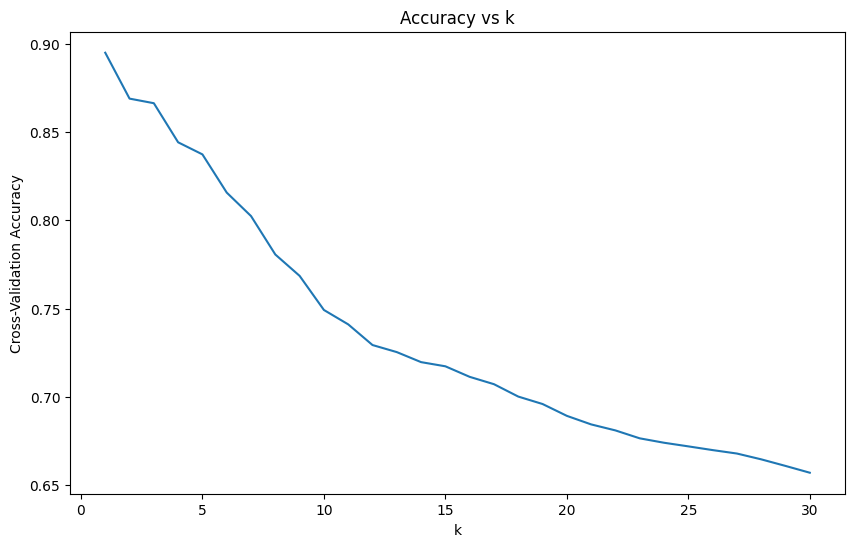

In [ ]:
#все данные присутсвуют
# Диапазон значений k
k_values = list(range(1, 31))
cv_scores = []

# Кросс-валидация
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# График точности
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores)
plt.xlabel('k')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Accuracy vs k')
plt.show()

# Задание 3

Многоклассовая классификация

Задание выполняется на том же датасете, на основании данных пытается определить lane_role

In [221]:
# df[df['lane_role']==4]
df

,player_slot,obs_placed,sen_placed,creeps_stacked,camps_stacked,rune_pickups,firstblood_claimed,teamfight_participation,towers_killed,roshans_killed,...,purchase_rapier,match_id,leagueid,performance_others,additional_units,repicked,hero_variant,neutral_tokens_log,neutral_item_history,item_neutral2
0,0,0.0,0.0,4.0,2.0,1.0,0.0,0.863636,0.0,0.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,"[{'time': 433, 'key': 'Tier1Token'}, {'time': ...",NaN,NaN
1,1,2.0,0.0,3.0,1.0,5.0,0.0,0.636364,3.0,0.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,"[{'time': 1918, 'key': 'Tier3Token'}]",NaN,NaN
2,2,0.0,0.0,6.0,2.0,7.0,0.0,0.227273,2.0,1.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,"[{'time': 473, 'key': 'Tier1Token'}, {'time': ...",NaN,NaN
3,3,9.0,12.0,66.0,12.0,1.0,0.0,0.227273,0.0,0.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,[],NaN,NaN
4,4,4.0,5.0,43.0,7.0,3.0,0.0,0.818182,1.0,0.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,128,3.0,2.0,8.0,3.0,0.0,0.0,0.400000,0.0,0.0,...,NaN,8245079060,17211,NaN,NaN,NaN,3.0,[],"[{'time': 488, 'item_neutral': 'mana_draught',...",1586.0
6416,129,0.0,0.0,0.0,0.0,3.0,0.0,0.266667,0.0,0.0,...,NaN,8245079060,17211,NaN,NaN,NaN,1.0,[],"[{'time': 450, 'item_neutral': 'polliwog_charm...",1577.0
6417,130,1.0,1.0,3.0,1.0,2.0,0.0,0.333333,1.0,0.0,...,NaN,8245079060,17211,NaN,NaN,NaN,2.0,[],"[{'time': 458, 'item_neutral': 'spark_of_coura...",1594.0
6418,131,2.0,0.0,0.0,0.0,11.0,0.0,0.866667,2.0,0.0,...,NaN,8245079060,17211,NaN,NaN,NaN,1.0,[],"[{'time': 461, 'item_neutral': 'trusty_shovel'...",1583.0


In [ ]:
# Осуществить предобработку данных - "подчистить данные".
# Выбор признаков и целевой переменной
features = [
    'last_hits', 'denies', 'gold_per_min', 'xp_per_min', 
    'hero_damage', 'tower_damage', 'hero_healing', 
    'observer_uses', 'sentry_uses', 'roshan_kills', 
    'tower_kills', 'kills', 'deaths', 'assists', 'kda', 
    'net_worth', 'gold_spent', 'lane_efficiency_pct', 
    'actions_per_min', 'neutral_kills', 'hero_id'
]

target = 'lane_role'
data = df[features + [target]]
data = data.dropna()
data['lane_role'] = data['lane_role'].astype(int)
data[data['lane_role']==4] = 3 #проблема в том, что роли 4 всего, а не предполагаемо 5
data

,last_hits,denies,gold_per_min,xp_per_min,hero_damage,tower_damage,hero_healing,observer_uses,sentry_uses,roshan_kills,...,deaths,assists,kda,net_worth,gold_spent,lane_efficiency_pct,actions_per_min,neutral_kills,hero_id,lane_role
0,228,0,595,793,23790,1082,0,0.0,0.0,0.0,...,8,11,2.11,18154,19990,89.0,287.0,90.0,2,3
1,286,1,616,748,19636,4663,0,2.0,0.0,0.0,...,4,8,2.80,20214,20500,93.0,369.0,103.0,11,2
2,494,1,764,1061,11558,4904,0,0.0,0.0,1.0,...,3,2,1.25,24323,27355,97.0,235.0,251.0,95,1
3,62,1,255,456,8902,0,0,3.0,2.0,0.0,...,6,5,0.86,9080,7790,28.0,270.0,23.0,37,1
4,23,0,325,540,16204,373,525,1.0,2.0,0.0,...,10,14,1.64,10159,8025,31.0,3.0,4.0,101,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,29,0,228,337,10346,538,0,1.0,0.0,0.0,...,6,4,0.86,5408,5035,34.0,324.0,2.0,9,3
6416,221,1,442,449,10149,612,941,0.0,0.0,0.0,...,4,4,0.80,12614,12900,85.0,229.0,88.0,29,3
6417,255,0,484,526,6320,865,0,1.0,0.0,0.0,...,5,4,0.83,11978,12110,66.0,281.0,182.0,109,1
6418,180,5,526,591,28362,933,0,2.0,0.0,0.0,...,5,2,2.17,14356,13970,91.0,326.0,30.0,7,2


In [261]:
X = data[features]
y = data[target].astype(int)
X,y

(      last_hits  denies  gold_per_min  xp_per_min  hero_damage  tower_damage  \
 0           228       0           595         793        23790          1082   
 1           286       1           616         748        19636          4663   
 2           494       1           764        1061        11558          4904   
 3            62       1           255         456         8902             0   
 4            23       0           325         540        16204           373   
 ...         ...     ...           ...         ...          ...           ...   
 6415         29       0           228         337        10346           538   
 6416        221       1           442         449        10149           612   
 6417        255       0           484         526         6320           865   
 6418        180       5           526         591        28362           933   
 6419         31       6           238         342        13436            96   
 
       hero_healing  obser

In [ ]:
#Разбить выборку на обучающую и тестовую.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42
)

In [ ]:
#Закодировать категориальные признаки при необходимости.
#Нормализовать данные.
numeric_features = ['last_hits', 'denies', 'gold_per_min', 'xp_per_min', 
                    'hero_damage', 'tower_damage', 'hero_healing', 
                    'observer_uses', 'sentry_uses', 'roshan_kills', 
                    'tower_kills', 'kills', 'deaths', 'assists', 'kda', 
                    'net_worth', 'gold_spent', 'lane_efficiency_pct', 
                    'actions_per_min', 'neutral_kills',]
categorical_features = ['hero_id']

# Определяем трансформер
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Масштабирование числовых признаков
        ('cat', OneHotEncoder(), categorical_features)  # Кодирование категориальных
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])

#Осуществить многоклассовую классификацию. 
#Посчитать метрики: accuracy, precision, recall, f-measure , а также составить classification_report.


# Обучение
pipeline.fit(X_train, y_train)

# Предсказания
y_pred = pipeline.predict(X_test)

# Оценка
print("После нормализации: ")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.81      0.78      9891
           2       0.88      0.79      0.83      5247
           3       0.78      0.76      0.77      9846

    accuracy                           0.79     24984
   macro avg       0.80      0.79      0.80     24984
weighted avg       0.79      0.79      0.79     24984



In [ ]:
# для 10 соседей
scaler_filtered = StandardScaler()
X_train_sc = scaler_filtered.fit_transform(X_train)
X_test_sc = scaler_filtered.transform(X_test)

# Обучение на отфильтрованных данных
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("После нормализации: ")
print(classification_report(y_test, y_pred))


После нормализации: 
              precision    recall  f1-score   support

           1       0.51      0.56      0.54      9891
           2       0.43      0.38      0.40      5247
           3       0.50      0.48      0.49      9846

    accuracy                           0.49     24984
   macro avg       0.48      0.48      0.48     24984
weighted avg       0.49      0.49      0.49     24984



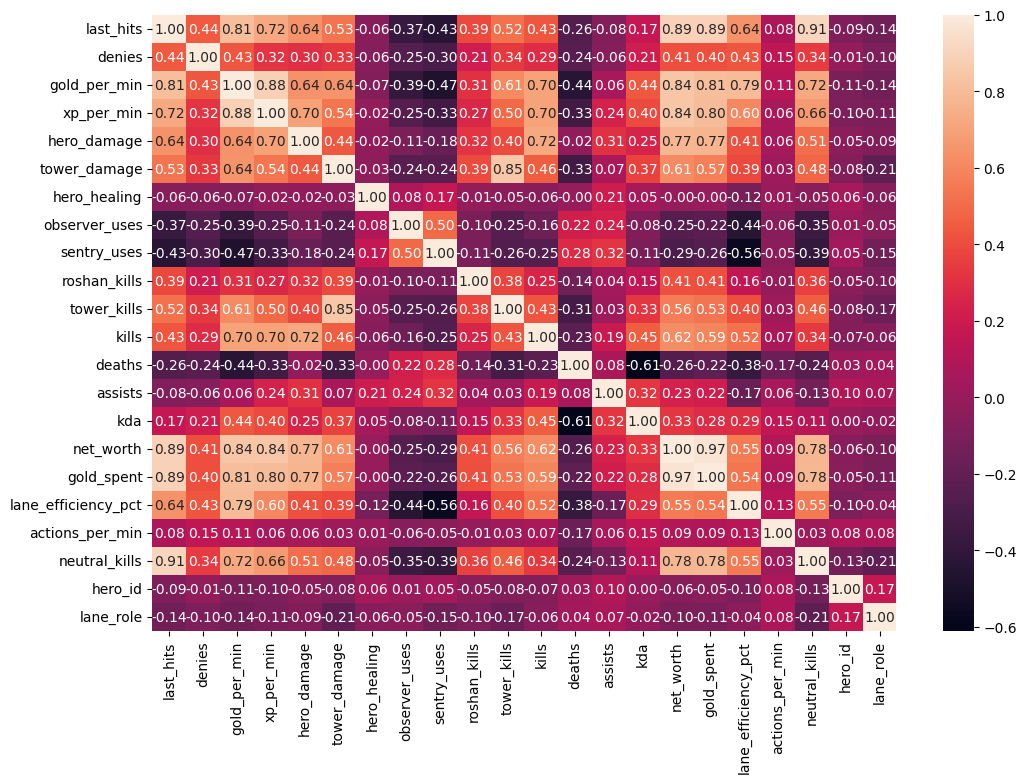

In [ ]:
#Построить сorrelation heatmap и/или воспользоваться методом corr(). Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

In [ ]:
#Осуществить многоклассовую классификацию с отфильтрованными признаками.
corr_with_target = data.corr()['lane_role'].abs().sort_values(ascending=False)
selected_features = corr_with_target[corr_with_target >= 0.1].index.tolist()
selected_features.remove('lane_role')

# Фильтрация данных
X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]

# Нормализация отфильтрованных данных
scaler_filtered = StandardScaler()
X_train_fs = scaler_filtered.fit_transform(X_train_filtered)
X_test_fs = scaler_filtered.transform(X_test_filtered)

# Обучение на отфильтрованных данных
knn_filtered = KNeighborsClassifier(n_neighbors=5)
knn_filtered.fit(X_train_fs, y_train)
y_pred_fs = knn_filtered.predict(X_test_fs)

#Посчитать метрики: accuracy, precision, recall, f-measure , а также составить classification_report.
print("После отбора признаков:")
print(classification_report(y_test, y_pred_fs))

После отбора признаков:
              precision    recall  f1-score   support

           1       0.64      0.72      0.68      9891
           2       0.58      0.55      0.56      5247
           3       0.64      0.59      0.61      9846

    accuracy                           0.63     24984
   macro avg       0.62      0.62      0.62     24984
weighted avg       0.63      0.63      0.63     24984



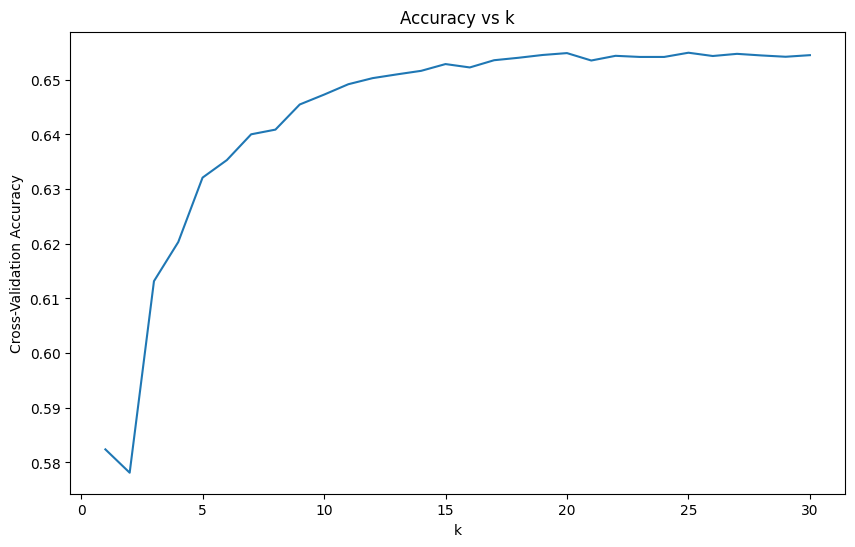

In [ ]:
#Перебрать значения гиперпараметра k в каком-нибудь диапазоне с использованием кросс-валидации на данных
k_values = list(range(1, 31))
cv_scores = []

# Кросс-валидация
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_fs, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# График точности
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores)
plt.xlabel('k')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Accuracy vs k')
plt.show()

In [ ]:
#Посчитать метрики: accuracy, precision, recall, f-measure , а также составить classification_report.
knn_filtered = KNeighborsClassifier(n_neighbors=20)
knn_filtered.fit(X_train_fs, y_train)
y_pred_fs = knn_filtered.predict(X_test_fs)

print("После отбора признаков:")
print(classification_report(y_test, y_pred_fs))

После отбора признаков:
              precision    recall  f1-score   support

           1       0.67      0.73      0.70      9891
           2       0.62      0.56      0.59      5247
           3       0.65      0.63      0.64      9846

    accuracy                           0.66     24984
   macro avg       0.65      0.64      0.64     24984
weighted avg       0.65      0.66      0.65     24984



Как видим, точность увеличилась.